In [1]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection, metrics

In [28]:
# Collecting data

df = pd.read_csv(r"C:\Users\meesa\Documents\Python-Jupyter\Jupyter-ML\ML Datasets\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


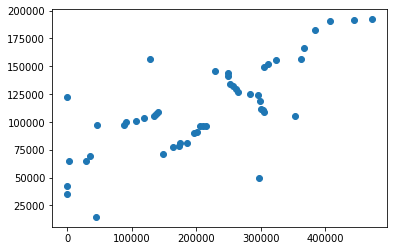

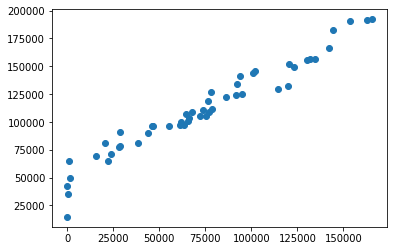

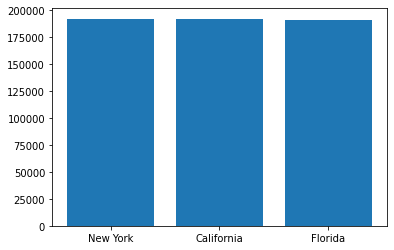

In [17]:
# Analayzing the data

plt.scatter(df['Marketing Spend'], df['Profit'])
plt.show()

plt.scatter(df['R&D Spend'], df['Profit'])
plt.show()

plt.bar(df['State'], df['Profit'])
plt.show()

In [30]:
# Data wrangling

State = pd.get_dummies(df['State'])
df = pd.concat([df, State], axis = 1)
df.drop(['Florida', 'State'], inplace = True, axis = 1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York,California,New York
0,165349.20,136897.80,471784.10,192261.83,0,1,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,0,0
3,144372.41,118671.85,383199.62,182901.99,0,1,0,1
4,142107.34,91391.77,366168.42,166187.94,0,0,0,0


In [31]:
# Splitting the data into training and testing data

X = df.drop(['Profit'], axis = 1).values
y = df['Profit'].values

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
# Training the model with testing data

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Testing the model and evaluating the performance

y_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

print(metrics.r2_score(y_test, y_predicted))

0.964961804206047
0.964961804206047
